In [1]:
import pandas as pd
from sklearn import tree
from sklearn import metrics
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("datasets/winequality-red.csv", sep=";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
len(df.iloc[0 , :])

12

In [5]:
set(df["quality"])

{3, 4, 5, 6, 7, 8}

In [6]:
quality_mapping = {3:0, 4:1, 5:2, 6:3, 7:4,8:5}

In [7]:
### TODO: Understand following operation

df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [9]:
## Shuffling of data
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.0,0.62,0.33,2.7,0.088,16.0,37.0,0.99720,3.31,0.58,10.7,3
1,7.9,0.58,0.23,2.3,0.076,23.0,94.0,0.99686,3.21,0.58,9.5,3
2,10.0,0.49,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,3
3,12.0,0.37,0.76,4.2,0.066,7.0,38.0,1.00040,3.22,0.60,13.0,4
4,8.2,0.34,0.38,2.5,0.080,12.0,57.0,0.99780,3.30,0.47,9.0,3


In [12]:
gf = df.sample(frac=0.6)

In [13]:
len(gf)

959

In [14]:
len(df)*0.6

959.4

In [16]:
df_training = df.head(1000)

In [17]:
df_testing = df.tail(599)

In [19]:
classifier = tree.DecisionTreeClassifier(max_depth=3)

In [21]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [22]:
len(features)

11

Here quality is output class

In [23]:
classifier.fit(df_training[features], df_training['quality'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
test_predictions = classifier.predict(df_testing[features])
train_predictions = classifier.predict(df_training[features])

In [33]:
accuracy = (test_predictions == df_testing['quality'])

In [34]:
train_accuracy = metrics.accuracy_score(df_training.quality, train_predictions)

In [35]:
test_accuracy = metrics.accuracy_score(df_testing.quality, test_predictions)

In [36]:
train_accuracy

0.6

In [37]:
test_accuracy

0.5459098497495827

In [41]:
matplotlib.rc("xtick", labelsize=20)
matplotlib.rc("ytick", labelsize=20)


In [47]:
train_accuracies = [0.5]
test_accuracies = [0.5]


for depth in range(1,25):
    classifier = tree.DecisionTreeClassifier(max_depth= depth)
    classifier.fit(df_training[features], df_training.quality)
    train_prediction = classifier.predict(df_training[features])
    test_prediction = classifier.predict(df_testing[features])
    train_acc = metrics.accuracy_score(train_prediction, df_training.quality)
    test_acc = metrics.accuracy_score(test_prediction, df_testing.quality)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Unrecognized location 'uppper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  """


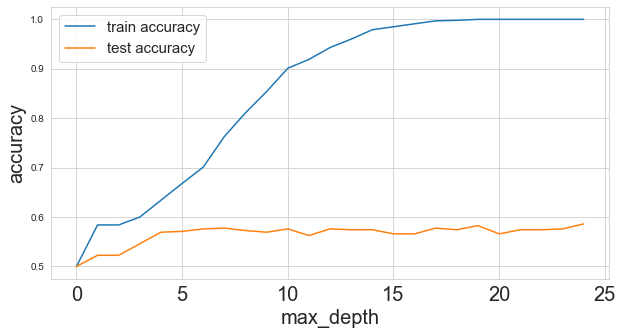

In [48]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="uppper left", prop={'size': 15})
plt.xticks(range(0,26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

## k-fold Cross Validation

In [15]:
import pandas as pd
from sklearn import model_selection

def kfoldCrossValidation(file_name: str, n_splits: int, sep=','):
    assert ".csv" in file_name
    df = pd.read_csv(file_name, sep)
    df["kfold"] = -1
    df = df.sample(frac=1).reset_index(drop=True)
    kf = model_selection.KFold(n_splits)
    
    
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
        
    return df
    

In [16]:
df = kfoldCrossValidation("datasets/winequality-red.csv", 5, ';')

In [20]:
df[df['kfold'] == 0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.6,0.520,0.12,3.0,0.067,12.0,53.0,0.99710,3.36,0.57,9.100000,5,0
1,9.6,0.770,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.400000,6,0
2,9.4,0.340,0.37,2.2,0.075,5.0,13.0,0.99800,3.22,0.62,9.200000,5,0
3,7.8,0.580,0.13,2.1,0.102,17.0,36.0,0.99440,3.24,0.53,11.200000,6,0
4,10.1,0.650,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.400000,6,0
5,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.950000,3,0
6,10.0,0.460,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.200000,6,0
7,8.3,0.490,0.36,1.8,0.222,6.0,16.0,0.99800,3.18,0.60,9.500000,6,0
8,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.500000,4,0
9,8.8,0.300,0.38,2.3,0.060,19.0,72.0,0.99543,3.39,0.72,11.800000,6,0


In wine dateset distribution of labels is :

Text(0, 0.5, 'count')

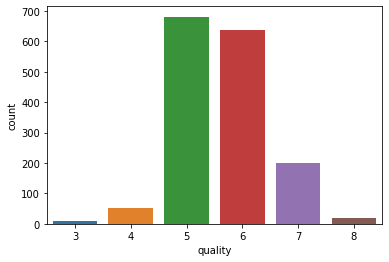

In [25]:
b = sns.countplot(x='quality', data=df)
b.set_xlabel("quality", fontsize=10)
b.set_ylabel("count", fontsize=10)

Since labels are not equally distributed we should consider stratified kfold. 

## Stratified KFold

In [26]:
import pandas as pd
from sklearn import model_selection

def stratifiedkfoldCrossValidation(file_name: str, n_splits: int, target_col_name: str, sep=','):
    assert ".csv" in file_name
    df = pd.read_csv(file_name, sep)
    df["kfold"] = -1
    df = df.sample(frac=1).reset_index(drop=True)
    y = df[target_col_name].values
    kf = model_selection.StratifiedKFold(n_splits)
    
    
    for fold, (trn_, val_) in enumerate(kf.split(X=df, y=y)):
        df.loc[val_, 'kfold'] = fold
        
    return df

In [27]:
df = stratifiedkfoldCrossValidation("datasets/winequality-red.csv", 5, 'quality', ';')

In [28]:
df[df['kfold'] == 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
188,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.900000,8,1
305,9.5,0.370,0.52,2.00,0.088,12.0,51.0,0.99613,3.29,0.58,11.100000,6,1
308,10.1,0.380,0.50,2.40,0.104,6.0,13.0,0.99643,3.22,0.65,11.600000,7,1
309,10.4,0.550,0.23,2.70,0.091,18.0,48.0,0.99940,3.22,0.64,10.300000,6,1
310,7.9,0.650,0.01,2.50,0.078,17.0,38.0,0.99630,3.34,0.74,11.700000,7,1
311,7.8,0.540,0.26,2.00,0.088,23.0,48.0,0.99810,3.41,0.74,9.200000,6,1
313,7.9,0.570,0.31,2.00,0.079,10.0,79.0,0.99677,3.29,0.69,9.500000,6,1
314,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.000000,6,1
318,10.6,1.020,0.43,2.90,0.076,26.0,88.0,0.99840,3.08,0.57,10.100000,6,1
320,7.2,0.500,0.18,2.10,0.071,12.0,31.0,0.99761,3.52,0.72,9.600000,6,1


Text(0, 0.5, 'count')

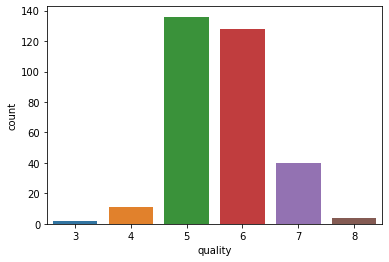

In [30]:
b = sns.countplot(x='quality', data=df[df['kfold']==2])
b.set_xlabel("quality", fontsize=10)
b.set_ylabel("count", fontsize=10)

As it is clear, ratio of labels is maintained in each fold.

**Rule of thumb**: If normal classification problem, use stratified kfold.